# Assignment 2:
## Abstract
Using statistical analysis and macroeconomical modelling, identify a **single** key primary risk factor or economic variable and its effect on both, the economy and methods in portfolio risk management; and discuss the validity of their analysis in assignment 1

## Introduction 

## Method

brief description of methods:

In [1]:
'''Downloading universal libraries and modules'''
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb

In [2]:
%matplotlib inline

In [3]:
np.random.seed(0)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

In [5]:
# We intend to 
start_dt = dt.date(1950, 1, 1)
end___dt = dt.date(2017,12,31)

indicators = {
    'money_supply': 'FM.LBL.BMNY.GD.ZS',
    'investments': 'BX.KLT.DINV.CD.WD',
    'XM': 'BN.CAB.XOKA.CD',
    'exchange_rate': 'DPANUSLCU',
    'lending_rate': 'FR.INR.LEND',
    'bond': 'DT.NFL.BOND.CD',
    'GDP': 'NY.GDP.PCAP.KD'
}

###### Describe each variable:



In [6]:
'''Downloading data from pandas_datareader.wb()'''
for key, value in enumerate(indicators.items()):
    globals()[f"{value[0]}"] = wb.download(country='ZAF', indicator=value[1], start=start_dt, end=end___dt)
    globals()[f"{value[0]}"].reset_index(level=0, drop=True, inplace=True)
    globals()[f"{value[0]}"].index = pd.to_datetime(arg=globals()[f"{value[0]}"].index, errors='ignore')

In [7]:
'''Combining all variables into a single dataframe'''
variables = pd.concat((money_supply, investments, XM, exchange_rate, lending_rate, bond, GDP), axis=1)
variables.fillna(value=0, inplace=True)
variables.columns = indicators.keys()

In [8]:
'''Exploring the data'''
print(variables.info())
print("="*80)
print(variables.sample(10))
print("="*80)
# variables.plot.box();
# plt.title('Distribution of Standardized variables')
# plt.xticks(rotation=90)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1960-01-01 to 2017-01-01
Freq: AS-JAN
Data columns (total 7 columns):
money_supply     58 non-null float64
investments      58 non-null float64
XM               58 non-null float64
exchange_rate    58 non-null float64
lending_rate     58 non-null float64
bond             58 non-null float64
GDP              58 non-null float64
dtypes: float64(7)
memory usage: 3.6 KB
None
            money_supply   investments            XM  exchange_rate  lending_rate          bond          GDP
year                                                                                                        
1995-01-01     48.618476  1.248425e+09 -2.493248e+09       3.625699     17.895833  7.308890e+08  5528.169471
1994-01-01     47.612311  3.744104e+08  2.962052e+07       3.548696     15.583333  1.503217e+09  5474.196930
2002-01-01     58.257756  1.479805e+09  1.009384e+09      10.502443     15.750000  1.983000e+09  6045.963188
1987-01-01     5

/home/neelkanth/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


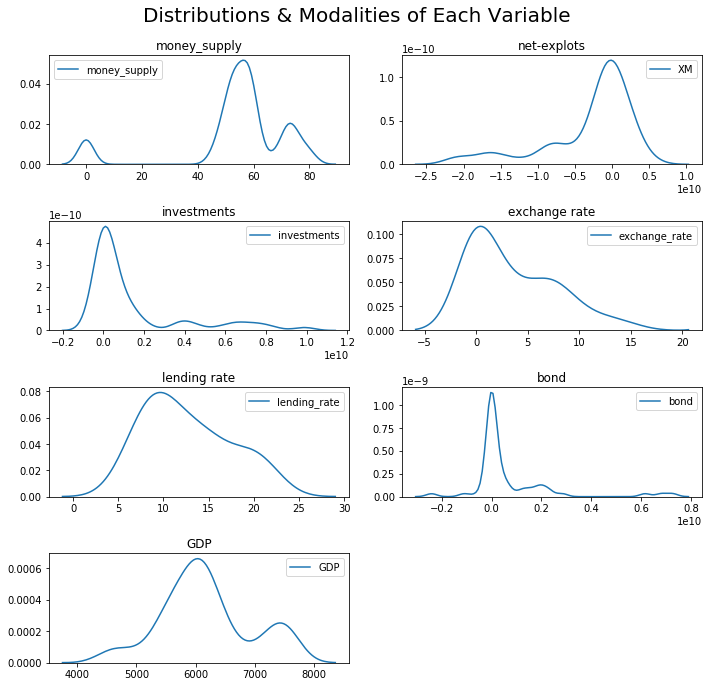

In [9]:
'''Examining the distribution of each variable'''
fig = plt.figure(figsize=(10,10))
fig.suptitle('Distributions & Modalities of Each Variable', fontsize=20)
ax1 = plt.subplot(4,2,1)
sns.kdeplot(data=variables.money_supply,ax=ax1)
ax1.set_title('money_supply')
ax2 = plt.subplot(4,2,3)
sns.kdeplot(data=variables.investments,ax=ax2)
ax2.set_title("investments")
ax3 = plt.subplot(4,2,2)
sns.kdeplot(data=variables.XM,ax=ax3)
ax3.set_title("net-explots")
ax4 = plt.subplot(4,2,4)
sns.kdeplot(data=variables.exchange_rate,ax=ax4)
ax4.set_title("exchange rate")
ax5 = plt.subplot(4,2,5)
sns.kdeplot(data=variables.lending_rate,ax=ax5)
ax5.set_title("lending rate")
ax6 = plt.subplot(4,2,6)
sns.kdeplot(data=variables.bond,ax=ax6)
ax6.set_title("bond")
ax7 = plt.subplot(4,2,7)
sns.kdeplot(data=variables.GDP,ax=ax7)
ax7.set_title("GDP")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The data contains all the numerical values. The unit measures of each variable is different; this needs to be standardized before we can perform PCA on the data. Further, application of several regression based machine learning algorithms *viz*., linear regression etc., assume normality of data.<br> The graph above indicates non-normality of the variables.

#### Data Pre-Processing

In [21]:
pct_var = variables.pct_change()[1:].replace(to_replace=np.inf,value=0).fillna(value=0)

In [28]:
pct_var[6:].head()

,money_supply,investments,XM,exchange_rate,lending_rate,bond,GDP
year,,,,,,,
1967-01-01,-0.037864,0.000000,1.552381,0.0,0.100000,0.0,0.043476
1968-01-01,0.050600,0.000000,-0.947761,0.0,0.010101,0.0,0.013750
1969-01-01,-0.008406,0.000000,23.500000,0.0,-0.040000,0.0,0.019009
1970-01-01,-0.003139,0.000000,1.685131,0.0,0.020833,0.0,0.023936
1971-01-01,-0.019084,-0.220452,0.154129,0.0,0.081633,0.0,0.014220


/home/neelkanth/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


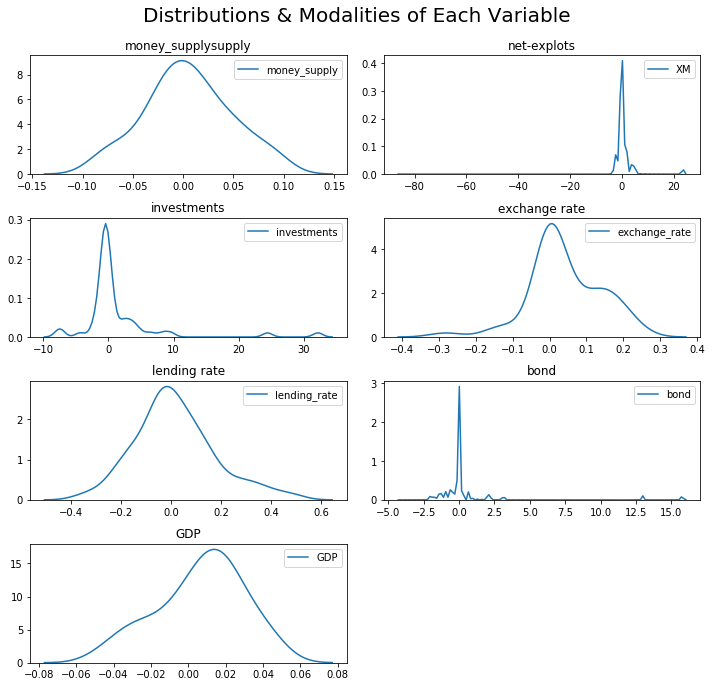

In [29]:
'''Re-examining the distribution and modality of each variable'''
fig = plt.figure(figsize=(10,10))
fig.suptitle('Distributions & Modalities of Each Variable', fontsize=20)
ax1 = plt.subplot(4,2,1)
sns.kdeplot(data=pct_var[6:].money_supply,ax=ax1)
ax1.set_title('money_supplysupply')
ax2 = plt.subplot(4,2,3)
sns.kdeplot(data=pct_var[6:].investments,ax=ax2)
ax2.set_title("investments")
ax3 = plt.subplot(4,2,2)
sns.kdeplot(data=pct_var[6:].XM,ax=ax3)
ax3.set_title("net-explots")
ax4 = plt.subplot(4,2,4)
sns.kdeplot(data=pct_var[6:].exchange_rate,ax=ax4)
ax4.set_title("exchange rate")
ax5 = plt.subplot(4,2,5)
sns.kdeplot(data=pct_var[6:].lending_rate,ax=ax5)
ax5.set_title("lending rate")
ax6 = plt.subplot(4,2,6)
sns.kdeplot(data=pct_var[6:].bond,ax=ax6)
ax6.set_title("bond")
ax7 = plt.subplot(4,2,7)
sns.kdeplot(data=pct_var[6:].GDP,ax=ax7)
ax7.set_title("GDP")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The distribution of the variables appears to get centered around 0, but it's still not normal. For variables 'bond' and 'net-exports', there's not enough data available either. 

#### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCAA, KernelPCA

#### Fitting the data to a _ model

## Concluding Discussions